In [ ]:
# They call me zesty 'cuz James Charles is my bestie!
import pandas as pd
import numpy as np
import string
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
exam_data = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

In [4]:
df = pd.DataFrame(exam_data, index = labels)

In [5]:
def_bet = df[(df['attempts'] > 1) & (df['score'] > 15)]

In [6]:
print(def_bet.head())

        name  score  attempts qualify
c  Katherine   16.5         2     yes
f    Michael   20.0         3     yes


In [7]:
df_two = df[['name', 'score']]

In [8]:
print(df_two.head())

        name  score
a  Anastasia   12.5
b       Dima    9.0
c  Katherine   16.5
d      James    NaN
e      Emily    9.0


In [9]:
def select(name1, name2, df_o):
    df_s = df_o[[name1, name2]]
    return df_s

In [10]:
df_selected = select('attempts', 'score', df)

In [11]:
print(df_selected.head())

   attempts  score
a         1   12.5
b         3    9.0
c         2   16.5
d         3    NaN
e         2    9.0


In [12]:
df_higher_2 = df[df['attempts'] > 2]

In [13]:
print(df_higher_2.head())

      name  score  attempts qualify
b     Dima    9.0         3      no
d    James    NaN         3      no
f  Michael   20.0         3     yes


In [14]:
print(len(df.axes[0]))
print(len(df.axes[1]))

10
4


In [15]:
df_na = df[df['score'].isna()]

In [16]:
print(df_na.head())

    name  score  attempts qualify
d  James    NaN         3      no
h  Laura    NaN         1      no


In [17]:
df_15_20 = df[(df['score'] > 15) & (df['score'] < 20)]

In [18]:
print(df_15_20.head())

        name  score  attempts qualify
c  Katherine   16.5         2     yes
j      Jonas   19.0         1     yes


In [19]:
df_between = df[3:]

In [20]:
print(df_between.head())

      name  score  attempts qualify
d    James    NaN         3      no
e    Emily    9.0         2      no
f  Michael   20.0         3     yes
g  Matthew   14.5         1     yes
h    Laura    NaN         1      no


In [21]:
df.loc['d', 'score'] = 11.5

In [22]:
print(df.head())

        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
d      James   11.5         3      no
e      Emily    9.0         2      no


In [23]:
attempt_total = df['attempts'].sum()
attempt_total

19

In [24]:
score_mean = df['score'].mean()
score_mean

13.333333333333334

In [25]:
df.loc['k'] = ['Suresh', 11.5, 1, 'yes']

In [26]:
print(df)

        name  score  attempts qualify
a  Anastasia   12.5         1     yes
b       Dima    9.0         3      no
c  Katherine   16.5         2     yes
d      James   11.5         3      no
e      Emily    9.0         2      no
f    Michael   20.0         3     yes
g    Matthew   14.5         1     yes
h      Laura    NaN         1      no
i      Kevin    8.0         2      no
j      Jonas   19.0         1     yes
k     Suresh   11.5         1     yes


In [27]:
df['qualify'] = df['qualify'].map({'yes': True, 'no': False})

In [28]:
print(df)

        name  score  attempts  qualify
a  Anastasia   12.5         1     True
b       Dima    9.0         3    False
c  Katherine   16.5         2     True
d      James   11.5         3    False
e      Emily    9.0         2    False
f    Michael   20.0         3     True
g    Matthew   14.5         1     True
h      Laura    NaN         1    False
i      Kevin    8.0         2    False
j      Jonas   19.0         1     True
k     Suresh   11.5         1     True


In [29]:
df['color'] = 'red'

In [30]:
print(df)

        name  score  attempts  qualify color
a  Anastasia   12.5         1     True   red
b       Dima    9.0         3    False   red
c  Katherine   16.5         2     True   red
d      James   11.5         3    False   red
e      Emily    9.0         2    False   red
f    Michael   20.0         3     True   red
g    Matthew   14.5         1     True   red
h      Laura    NaN         1    False   red
i      Kevin    8.0         2    False   red
j      Jonas   19.0         1     True   red
k     Suresh   11.5         1     True   red


In [31]:
def has_letter(s, l):
    series = pd.Series(list(s), name = 'Character')
    character_counts = series.value_counts()
    # print(character_counts)
    return character_counts.get(l, 0) != 0

In [32]:
has_letter('jacob', 'M')

False

In [33]:
df['contains j'] = df['name'].apply(lambda x: has_letter(x, 'a'))

In [34]:
print(df)

        name  score  attempts  qualify color  contains j
a  Anastasia   12.5         1     True   red        True
b       Dima    9.0         3    False   red        True
c  Katherine   16.5         2     True   red        True
d      James   11.5         3    False   red        True
e      Emily    9.0         2    False   red       False
f    Michael   20.0         3     True   red        True
g    Matthew   14.5         1     True   red        True
h      Laura    NaN         1    False   red        True
i      Kevin    8.0         2    False   red       False
j      Jonas   19.0         1     True   red        True
k     Suresh   11.5         1     True   red       False


In [35]:
# Example data
np.random.seed(123)
x = np.random.rand(100, 1)
y = 2 * x[:, 0] + 0.5 * np.random.randn(100)

In [36]:
x = sm.add_constant(x)

In [37]:
model = sm.OLS(y, x)

In [38]:
results = model.fit()

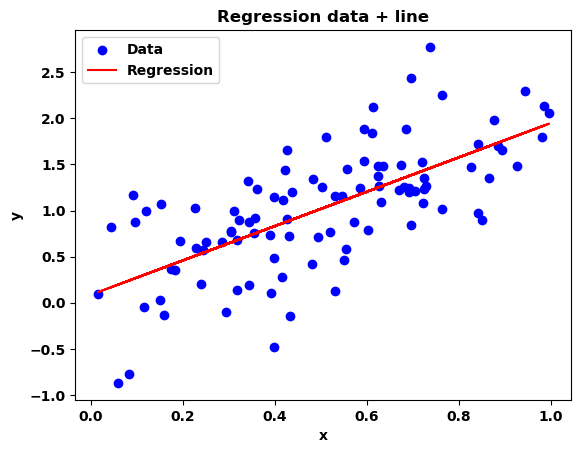

In [39]:
plt.scatter(x[:, 1], y, color = 'blue', label = 'Data')
plt.plot(x[:, 1], results.predict(x), color = 'red', label = 'Regression')

plt.title('Regression data + line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [40]:
np.random.seed(42)
n_samples = 100
bedrooms = np.random.randint(2, 5, n_samples)
square_footage = np.random.randint(1000, 2500, n_samples)
crime_rate = np.random.uniform(0, 1, n_samples)
price = 50000 + 200 * bedrooms + 50 * square_footage - 300 * crime_rate + np.random.normal(0, 10000, n_samples)

In [41]:
house_price = pd.DataFrame({'Bedrooms': bedrooms, 'squareFootage': square_footage, 'crimeRate': crime_rate, 'Price': price})

In [42]:
X = house_price[['Bedrooms', 'squareFootage', 'crimeRate']]
y = house_price['Price']

In [43]:
X = sm.add_constant(X)

In [44]:
scatter_feature = 'squareFootage'
model = sm.OLS(y, X)

In [45]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     139.4
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           7.34e-35
Time:                        18:31:25   Log-Likelihood:                -1061.8
No. Observations:                 100   AIC:                             2132.
Df Residuals:                      96   BIC:                             2142.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.771e+04   7121.707      6.699

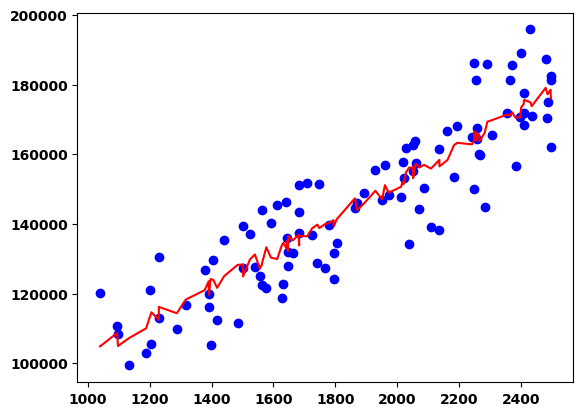

In [46]:
x_sorted = X[scatter_feature].sort_values()
plt.scatter(X[scatter_feature], y, color = 'blue', label = 'Data')
plt.plot(x_sorted, results.predict(X.loc[x_sorted.index]), color = 'red', label = 'Reg Line')

In [47]:
np.random.seed(42)
x = np.random.rand(100, 1)
y = 2 * x[:, 0] + 0.5 * np.random.randn(100)

In [48]:
x = sm.add_constant(x)

In [49]:
model = sm.OLS(y, x)
results = model.fit()

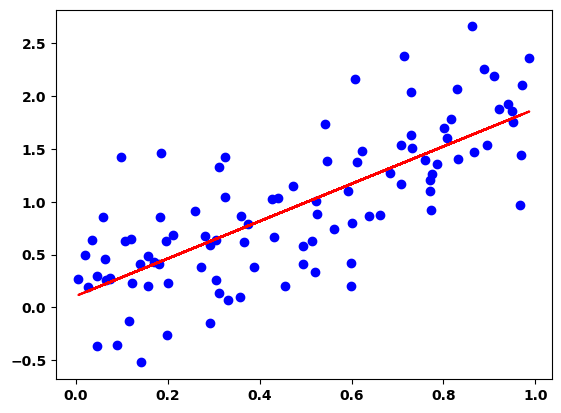

In [50]:
plt.scatter(x[:, 1], y, color = 'blue', label = 'Data')
plt.plot(x[:, 1], results.predict(x), color = 'red', label = 'line')